## Regression

### Playstore Apps Rating Prediction based on multiple variables

In this lesson, we will cover the following concepts with the help of a business use case:
* Use Case: Regression
* Regression Algorithms
* Types of Model Evaluation Metrics
* Gradient Descent
* Types of Gradient Descents
* Use Case: Stochastic Gradient Descent (SGD)


#### Problem Statement

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

#### <b> **Analysis to be done:** </b>

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

## Import Libraries

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'googleplaystore.csv',
 'RatingvsCategor.png',
 'Regression_project_with_Playstore_Rating_prediction.ipynb',
 'Untitled.ipynb']

In [3]:
#importing the dataset
inp = pd.read_csv("googleplaystore.csv")

In [4]:
#checking top 5 rows
inp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#observations
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#check the data types
inp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
#check columns
inp.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
#check the no of rows and columns
inp.shape

(10841, 13)

In [9]:
#size of the data set
inp.size

140933

In [10]:
#check the null values in the dataset
inp.isnull().sum(axis = 0)#.any()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
#description of the data set numeric column
inp.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
#treat the null values - drop the null vaules a
inp.dropna(how = 'any', inplace = True)

In [13]:
inp.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
inp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
# cleaning the price column
inp.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

In [16]:
#modify the column with conditions
#remove M and K

inp['Price'] = inp.Price.map(lambda x: 0 if x =='0' else float(x[1:]))

In [17]:
inp.Price.value_counts().head()

Price
0.00    8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: count, dtype: int64

In [18]:
inp.Reviews.describe()

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

In [19]:
#converting Reviews to numeric
inp.Reviews = inp.Reviews.astype("int32")

In [20]:
inp.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [21]:
#handling the Installs column
inp.Installs.value_counts()
#inp['Installs'].value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [22]:
#cleaning the installs column, remove comma and plus
#definging a function for it

def clean_installs(val):
    return val.replace(",","").replace("+","")

In [23]:
#using the above function to clean the data
inp.Installs = inp.Installs.map(clean_installs)

In [24]:
inp.Installs.describe()

count        9360
unique         19
top       1000000
freq         1576
Name: Installs, dtype: object

In [25]:
inp.Installs = inp.Installs.astype("int32")

In [26]:
inp.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [27]:
inp.Size.value_counts().tail()

Size
383k    1
454k    1
812k    1
442k    1
619k    1
Name: count, dtype: int64

In [28]:
def clean_size(size):
    if 'G' in size:
        x = size[:-1]
        x = float(x)*1000000
        return x
    elif 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return x
    elif 'k' in size:
        x = size[:-1]
        x = float(x)
        return x
    else:
        return None

In [29]:
inp.Size = inp.Size.map(clean_size)

In [30]:
inp.Size.isnull().sum()

1637

In [31]:
#fill the None values in the Size column
inp.Size.fillna(method= 'ffill', inplace = True)  # filling with forward fill as there is no trend. and mean would skew the data more

In [32]:
inp.Size.isnull().sum()

0

In [33]:
inp.Size.describe()

count      9360.000000
mean      23143.466079
std       23245.147490
min           8.500000
25%        5500.000000
50%       15000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [34]:
inp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [35]:
#To check if rating is betn 0 and 5. 
inp.Rating.describe()  # Note that Max is 5 

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [36]:
# checking if Reviews are more than installs
len(inp[inp.Reviews >inp.Installs])

7

In [37]:
inp[inp.Reviews >inp.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [38]:
inp = inp[inp.Reviews <= inp.Installs].copy()

In [39]:
inp.shape

(9353, 13)

In [40]:
#check if An app is Free and price is more than 0
len(inp[(inp.Type =='Free') & (inp.Price >0)])

0

### Exploratory Data Analysis & Tutlier Treatment

#### Box Plot : Price

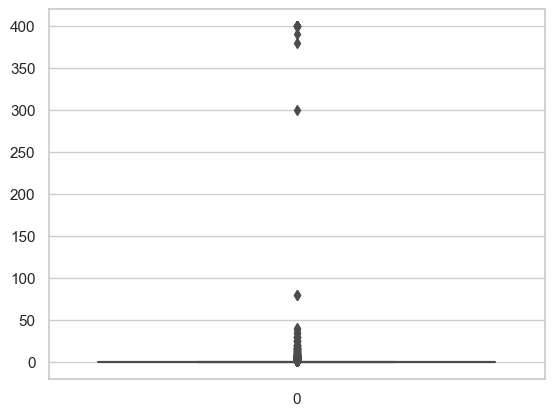

In [41]:
sns.set_theme(style = 'whitegrid')
sns.boxplot(inp.Price)
plt.show()

From the above plot, it implies that Apps with 'Price' above 50, can be considered as outliers
Hence check and drop the rows

In [42]:
len(inp[inp.Price > 50])

17

In [43]:
inp[inp.Price > 50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up


In [44]:
inp = inp[inp.Price <= 50].copy()

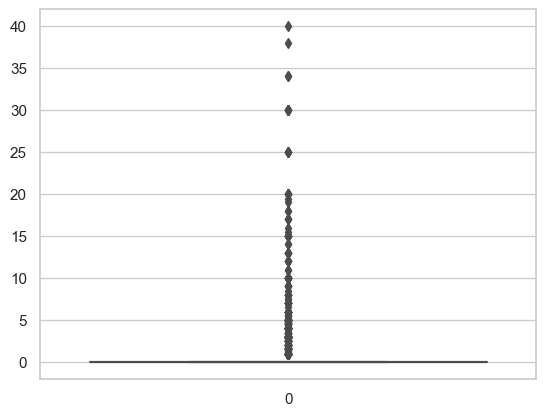

In [45]:
sns.set_theme(style = 'whitegrid')
sns.boxplot(inp.Price)
plt.show()

#### Installs 

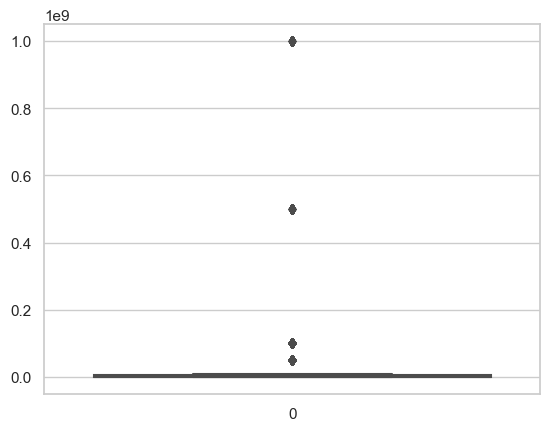

In [46]:
sns.boxplot(inp.Installs)
plt.show()

From the above plot, we observe that the no. of 'Installs' above 100 Million are less, and we can drop as more no of installs won't help much in our analysis

In [47]:
len(inp[inp.Installs >= 100000000])

539

In [48]:
inp.shape

(9336, 13)

In [49]:
# checking the qualtile for the Installs
inp.Installs.quantile([0.1, 0.25, 0.5, 0.7, 0.9,0.92, 0.95, 0.97, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      5000000.0
0.90     10000000.0
0.92     50000000.0
0.95    100000000.0
0.97    100000000.0
0.99    500000000.0
Name: Installs, dtype: float64

In [50]:
inp = inp[inp.Installs < 100000000].copy()

In [51]:
len(inp[inp.Installs >= 100000000])

0

In [52]:
inp.Installs.quantile([0.1, 0.25, 0.5, 0.7, 0.9,0.92,0.95, 0.97, 0.99])

0.10        1000.0
0.25       10000.0
0.50      500000.0
0.70     1000000.0
0.90    10000000.0
0.92    10000000.0
0.95    10000000.0
0.97    50000000.0
0.99    50000000.0
Name: Installs, dtype: float64

### Reviews

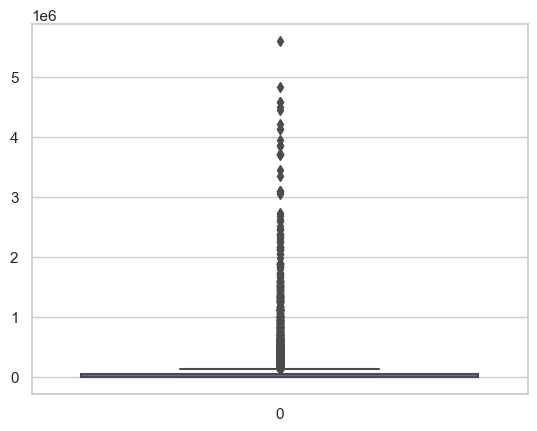

In [53]:
sns.boxplot(inp.Reviews)
plt.show()

More Reviews won't help much in predicting the Rating for Latest apps, hence Reviews above 2 Million can be dropped.

In [54]:
len(inp[inp.Reviews >= 2000000])

56

In [55]:
inp = inp[inp.Reviews <= 2000000].copy()

In [56]:
inp.shape

(8741, 13)

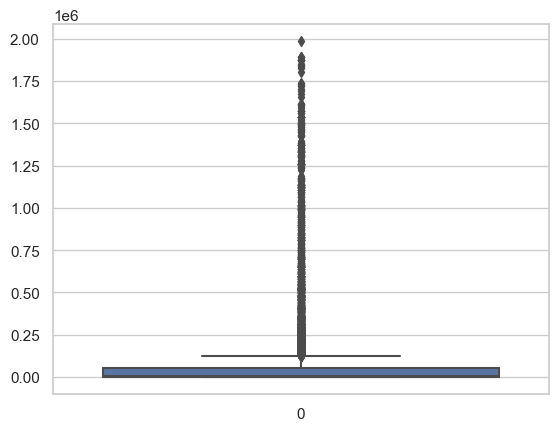

In [57]:
sns.boxplot(inp.Reviews)
plt.show()

#### Checking distribution and skewness

<function matplotlib.pyplot.show(close=None, block=None)>

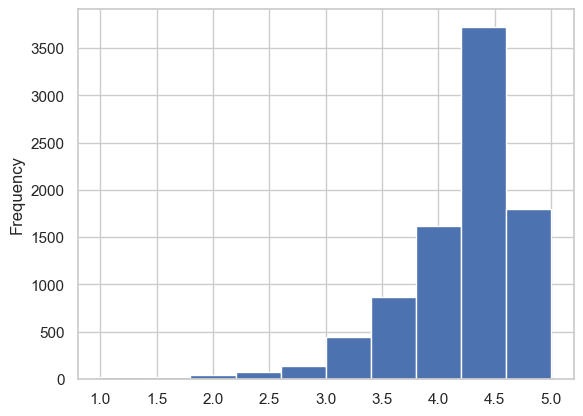

In [58]:
inp.Rating.plot.hist()
plt.show()

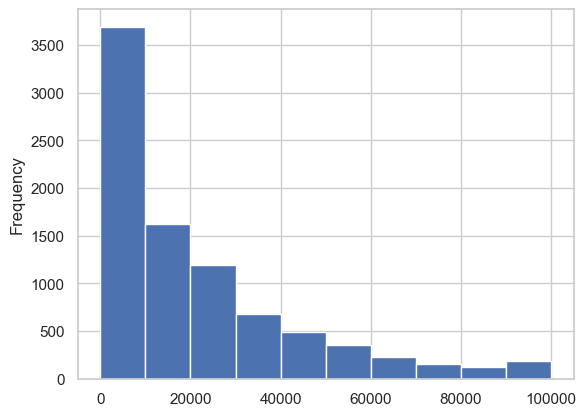

In [59]:
inp["Size"].plot.hist()
plt.show()

In [60]:
inp.shape

(8741, 13)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


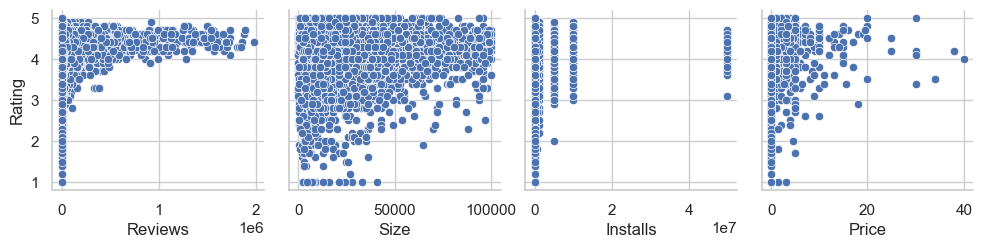

In [61]:
#plt.figure(figsize = (18,10))
sns.pairplot(data = inp, y_vars = 'Rating' , x_vars = ['Reviews', 'Size', 'Installs', 'Price'])

### Warnings importing (optional)

In [62]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

### Bi-Variate Analysis

In [63]:
inp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


###### Scatter Plot/Joint Plot for Ratings vs Price

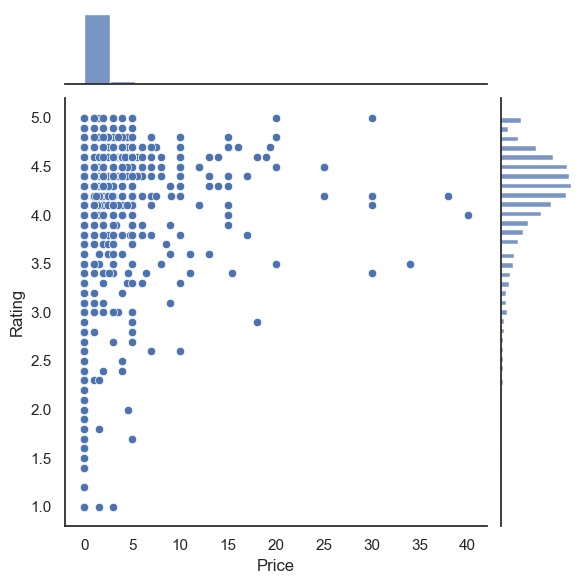

In [64]:
sns.set_style("white")
#sns.scatterplot(data = inp, x = inp.Price, y = inp.Rating)
sns.jointplot(data = inp, x = inp.Price, y = inp.Rating)


###### 2. Ratings vs Size

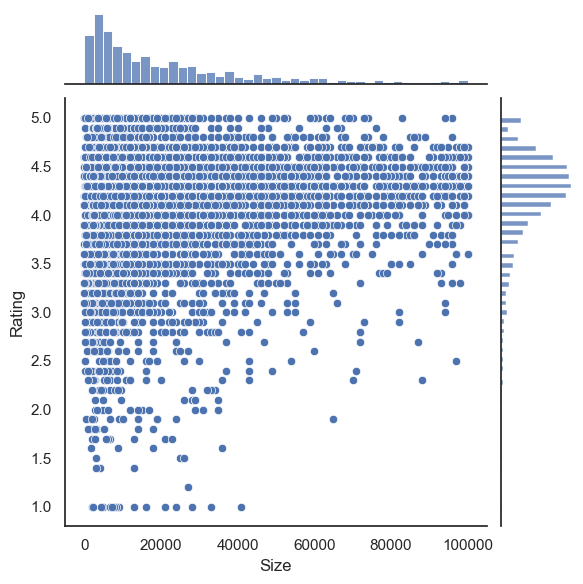

In [65]:
#sns.set_style("white")
#plt.figure(figsize=(1,1))
sns.jointplot(data = inp, x = inp.Size, y = inp.Rating)

###### 3. Rating vs Reviews

<Axes: xlabel='Reviews', ylabel='Rating'>

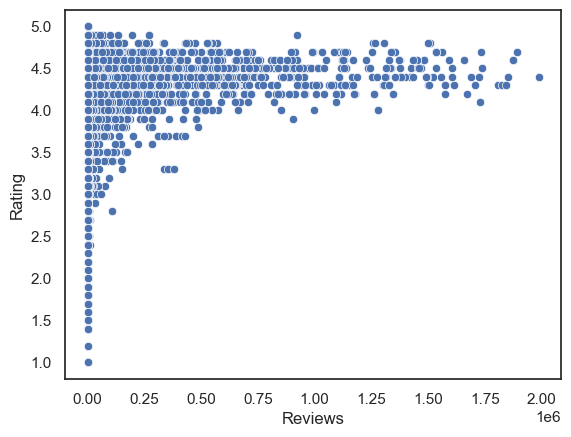

In [66]:
sns.scatterplot(data = inp, x = inp.Reviews, y = inp.Rating)

In [67]:
inp.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

###### 4. Rating vs Content Rating 
Box plot as content rating is non numeric

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone_10+'),
  Text(3, 0, 'Mature_17+'),
  Text(4, 0, 'Adults_only_18+'),
  Text(5, 0, 'Unrated')])

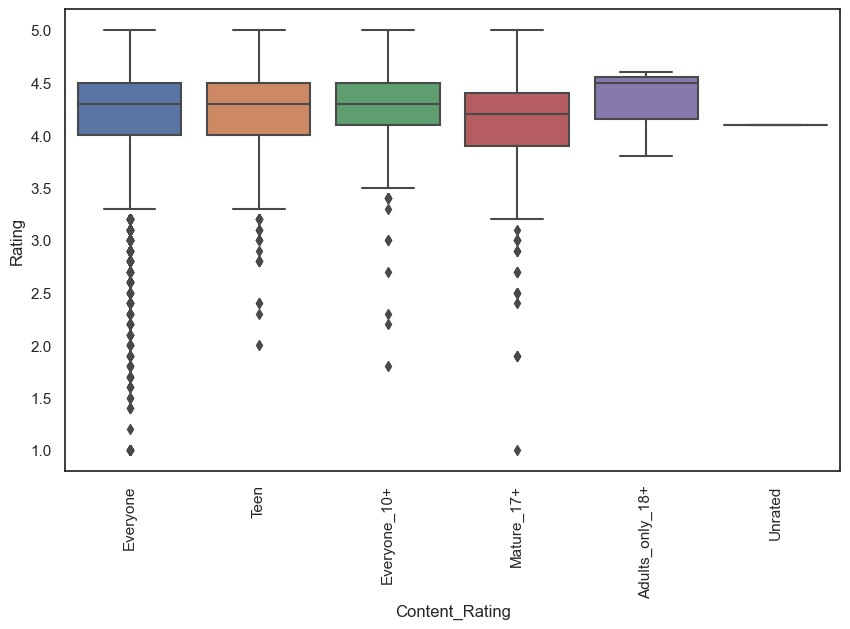

In [68]:
plt.figure(figsize= (10,6))
sns.boxplot(data = inp, x = inp.Content_Rating, y = inp.Rating)
plt.xticks(rotation = 90)

###### 5.Ratings vs Category

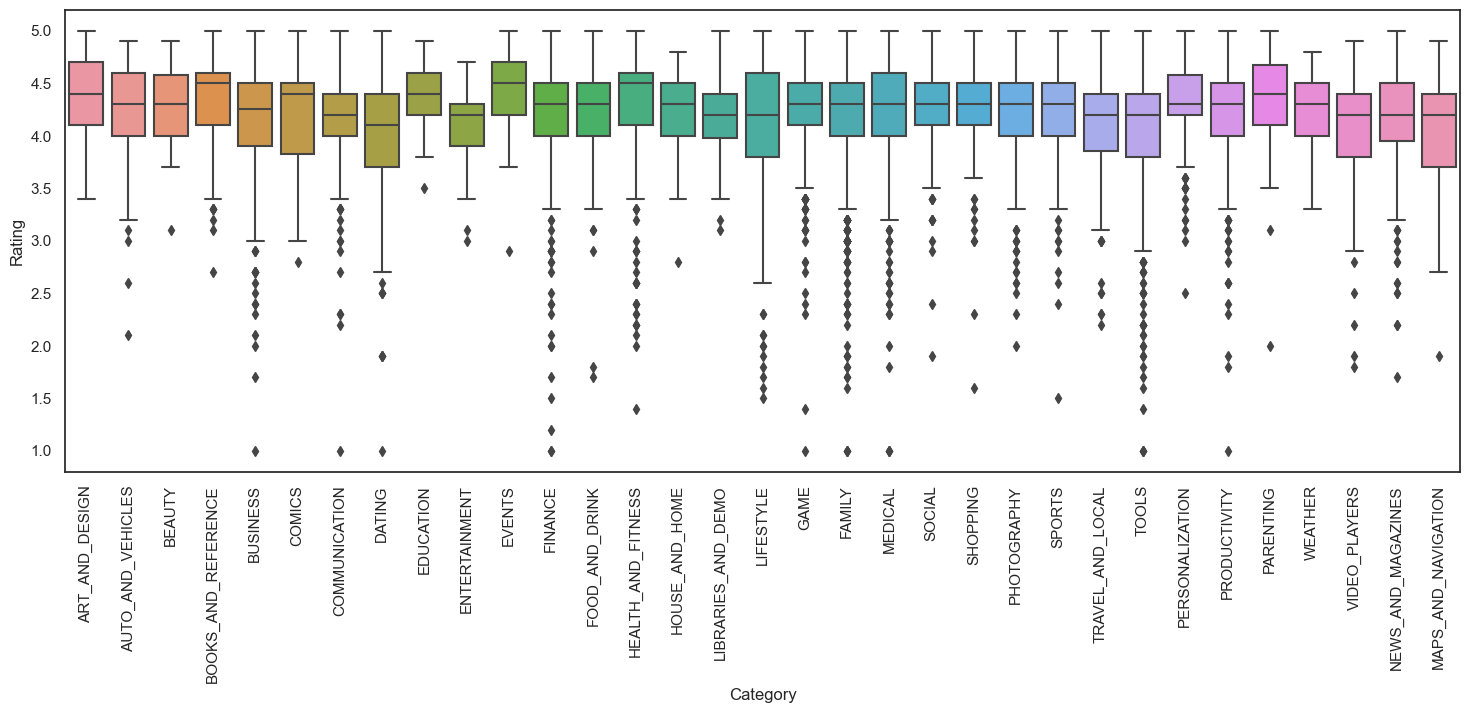

In [69]:
plt.figure(figsize = (18,6))
sns.boxplot(data = inp, x = "Category" , y = "Rating")
plt.xticks(rotation = 90)
plt.savefig('RatingvsCategor.png')

##### Pre-Processing the data set
Make a copy

In [70]:
inp1 = inp.copy()

In [71]:
# apply log transformation to reviews and Installs

In [72]:
# reducing the skew
inp.Installs.describe()

count    8.741000e+03
mean     3.487663e+06
std      8.660249e+06
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      5.000000e+06
max      5.000000e+07
Name: Installs, dtype: float64

In [73]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [74]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [75]:
inp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [76]:
inp1.shape

(8741, 13)

In [77]:
#Dropping the variables that are not useful for our task (Srikant. Kamatagi)
inp1.drop(["App","Last Updated", "Current Ver", "Android Ver"], axis = 1, inplace = True)

In [78]:
inp1.shape

(8741, 9)

In [79]:
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

##### Get dummies

In [80]:
inp2 = pd.get_dummies(inp1, drop_first= True)

In [81]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [82]:
inp2.shape

(8741, 157)

##### Train- Test-split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [85]:
df_train.shape, df_test.shape

((6118, 157), (2623, 157))

In [86]:
y_train = df_train.pop("Rating")

In [87]:
y_train.head(1)

6982    4.7
Name: Rating, dtype: float64

In [88]:
X_train = df_train

In [89]:
X_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
6982,9.929935,25000.0,13.122365,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
y_test = df_test.pop("Rating")

In [91]:
X_test = df_test

In [92]:
X_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
7301,3.555348,4000.0,6.908755,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
# import statsmodel library
import statsmodels.api as sm

In [94]:
model1 = sm.OLS(y_train, X_train.astype(float))

In [95]:
model1 = model1.fit()

In [96]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3609.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:31:02   Log-Likelihood:                         -4192.3
No. Observations:                6118   AIC:                                      8637.
Df Residuals:                    5992   BIC:                                      9483.
Df Model:                         126                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1743      0.006     27.547      0.000       0.162       0.187
Size                                         -2.474e-09   3.37e-07     -0.007      0.994   -6.64e-07    6.59e-07
Installs                                        -0.1499      0.006    -23.660      0.000      -0.162      -0.138
Price                                            0.0001      0.005      0.021      0.983      -0.010       0.010
Category_AUTO_AND_VEHICLES                       2.0585      0.137     15.041      0.000       1.790       2.327
Category_BEAUTY                                  2.1151      0.139     15.189      0.000       1.842       2.388
Category_BOOKS_AND_REFERENCE                     2.0890      0.134     15.554      0.000       1.826       2.352
Category_BUSINESS                                1.9836      0.133     14.869      0.000       1.722       2.245
Category_COMICS                                  2.8902      0.238     12.158      0.000       2.424       3.356
Category_COMMUNICATION                           1.9497      0.134     14.574      0.000       1.687       2.212
Category_DATING                                  1.9177      0.135     14.226      0.000       1.653       2.182
Category_EDUCATION                               3.7592      0.279     13.487      0.000       3.213       4.306
Category_ENTERTAINMENT                           3.6269      0.279     12.999      0.000       3.080       4.174
Category_EVENTS                                  2.1691      0.138     15.740      0.000       1.899       2.439
Category_FAMILY                                  3.7478      0.272     13.783      0.000       3.215       4.281
Category_FINANCE                                 1.9603      0.133     14.701      0.000       1.699       2.222
Category_FOOD_AND_DRINK                          2.0036      0.135     14.806      0.000       1.738       2.269
Category_GAME                                    3.9559      0.267     14.838      0.000       3.433       4.479
Category_HEALTH_AND_FITNESS                      2.0285      0.134     15.185      0.000       1.767       2.290
Category_HOUSE_AND_HOME                          1.9921      0.137     14.590      0.000       1.724       2.260
Category_LIBRARIES_AND_DEMO                      2.0463      0.137     14.889      0.000       1.777       2.316
Category_LIFESTYLE                               1.9898      0.133     14.915      0.000       1.728       2.251
Category_MAPS_AND_NAVIGATION                     1.9533      0.135     14.462      0.000       1.689       2.218
Category_MEDICAL                              

In [97]:
# predicting the y from test
import sklearn.metrics as metrics
y_test_pred = model1.predict(X_test)

In [98]:
#assessing the Root mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.5096352757373669


In [99]:
# defining MPE - mean percentage error
def MPE(y_test, y_test_pred):
    return (((y_test - y_test_pred)/y_test).mean()) * 100
print('MPE: ' + str(MPE(y_test, y_test_pred)))

MPE: -2.278182741203155


In [100]:
# defining mean absolute percentage error
def MAPE(y_test, y_test_pred):
    return (np.mean(np.abs(y_test - y_test_pred)/y_test)*100)
print('MAPE: ' + str(MAPE(y_test, y_test_pred)))

MAPE: 9.84718099762957


##### Feature Selection

In [101]:
# found 99 variables with p-value less than 0.05

In [102]:
#Create inp3
inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY',
             'Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
             'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION',
             'Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
             'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS',
             'Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE',
             'Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES',
             'Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY',
             'Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL',
             'Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone',
             'Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated',
             'Genres_Art_&_Design','Genres_Art_&_Design_Creativity','Genres_Art_&_Design_Pretend_Play',
             'Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board_Brain_Games','Genres_Books_&_Reference',
             'Genres_Business','Genres_Casual','Genres_Casual_Action_&_Adventure','Genres_Casual_Brain_Games',
             'Genres_Casual_Pretend_Play','Genres_Comics','Genres_Comics_Creativity','Genres_Communication',
             'Genres_Dating','Genres_Education','Genres_Education_Action_&_Adventure','Genres_Education_Creativity',
             'Genres_Education_Education','Genres_Education_Pretend_Play','Genres_Educational_Education',
             'Genres_Educational_Pretend_Play','Genres_Entertainment','Genres_Entertainment_Brain_Games',
             'Genres_Entertainment_Creativity','Genres_Entertainment_Music_&_Video','Genres_Events',
             'Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home',
             'Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical',
             'Genres_Music_Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting_Education',
             'Genres_Parenting_Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity',
             'Genres_Puzzle','Genres_Puzzle_Brain_Games','Genres_Racing_Action_&_Adventure','Genres_Role_Playing',
             'Genres_Shopping','Genres_Simulation','Genres_Simulation_Action_&_Adventure','Genres_Social',
             'Genres_Strategy','Genres_Tools','Genres_Tools_Education','Genres_Travel_&_Local',
             'Genres_Travel_&_Local_Action_&_Adventure','Genres_Weather']]

In [103]:
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                     bool
Category_BEAUTY                                bool
                                             ...   
Genres_Tools                                   bool
Genres_Tools_Education                         bool
Genres_Travel_&_Local                          bool
Genres_Travel_&_Local_Action_&_Adventure       bool
Genres_Weather                                 bool
Length: 100, dtype: object

In [104]:
inp3.shape

(8741, 100)

In [105]:
df_train, df_test = train_test_split(inp3, train_size= 0.7, random_state= 100)

In [106]:
df_train.shape, df_test.shape

((6118, 100), (2623, 100))

In [107]:
y_train1 = df_train.pop('Rating')

In [108]:
X_train1 = df_train

In [109]:
X_train1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
6982,9.929935,13.122365,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
y_test1 = df_test.pop('Rating')

In [111]:
X_test1 = df_test

In [112]:
X_test1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
7301,3.555348,6.908755,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
#create a 2nd model with new data
model2 = sm.OLS(y_train1, X_train1.astype(float))

In [114]:
model2 = model2.fit()

In [115]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6240.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:31:05   Log-Likelihood:                         -4213.7
No. Observations:                6118   AIC:                                      8573.
Df Residuals:                    6045   BIC:                                      9064.
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1735      0.006     27.757      0.000       0.161       0.186
Installs                                    -0.1481      0.006    -23.579      0.000      -0.160      -0.136
Category_AUTO_AND_VEHICLES                   2.0380      0.137     14.923      0.000       1.770       2.306
Category_BEAUTY                              2.0951      0.139     15.076      0.000       1.823       2.368
Category_BOOKS_AND_REFERENCE                 2.0692      0.134     15.438      0.000       1.806       2.332
Category_BUSINESS                            1.9635      0.133     14.749      0.000       1.703       2.225
Category_COMICS                              2.8656      0.237     12.073      0.000       2.400       3.331
Category_COMMUNICATION                       1.9292      0.133     14.452      0.000       1.668       2.191
Category_DATING                              1.9022      0.135     14.134      0.000       1.638       2.166
Category_EDUCATION                           1.9406      0.136     14.221      0.000       1.673       2.208
Category_EDUCATION                           1.9406      0.136     14.221      0.000       1.673       2.208
Category_ENTERTAINMENT                       3.7500      0.273     13.718      0.000       3.214       4.286
Category_EVENTS                              2.1508      0.138     15.636      0.000       1.881       2.420
Category_FAMILY                              3.8680      0.266     14.523      0.000       3.346       4.390
Category_FINANCE                             1.9400      0.133     14.580      0.000       1.679       2.201
Category_FOOD_AND_DRINK                      1.9828      0.135     14.684      0.000       1.718       2.247
Category_GAME                                3.9327      0.265     14.837      0.000       3.413       4.452
Category_HEALTH_AND_FITNESS                  2.0080      0.133     15.065      0.000       1.747       2.269
Category_HOUSE_AND_HOME                      1.9706      0.136     14.463      0.000       1.704       2.238
Category_LIBRARIES_AND_DEMO                  2.0257      0.137     14.770      0.000       1.757       2.295
Category_LIFESTYLE                           1.9702      0.133     14.798      0.000       1.709       2.231
Category_MAPS_AND_NAVIGATION                 1.9326      0.135     14.340      0.000       1.668       2.197
Category_MEDICAL                             2.0185      0.133     15.178      0.000       1.758       2.279
Category_NEWS_AND_MAGAZINES                  1.9543      0.134     14.633      0.000       1.693       2.216
Category_PARENTING                       

In [116]:
# predicting using model2
import sklearn.metrics as metrics

In [117]:
y_test_pred1 = model2.predict(X_test1)

In [118]:
print(np.sqrt(metrics.mean_squared_error(y_test1, y_test_pred1)))

0.5092427997227157


In [119]:
def MAPEE(y_test1, y_test_pred1):
    return np.mean(np.abs((y_test1 - y_test_pred1)/y_test1)) * 100
print('MAPE: ' + str(MAPEE(y_test1, y_test_pred1)))

MAPE: 9.82898607995677


Model2 shows slight improvement as RMSE and MAPE is slightly lower than model1

#### Use Case: Ridge, Lasso, ElasticNet Regression for Training and Prediction:

We are going to use the same dataset that we used in the previous use case at the time of training of "model2" i.e. inp3

### Ridge Regression

In [120]:
# Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.001)
ridgeReg.fit(X_train1, y_train1)

Ridge(alpha=0.001)

#### Evaluating using RMSE

In [121]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, ridgeReg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, ridgeReg.predict(X_test1))))
print("R2 Value/coefficient of Determination: {}".format(ridgeReg.score(X_test1, y_test1)))

0.4803176854377079
0.4954908773814979
R2 Value/coefficient of Determination: 0.1415209820696729


### Lasso Regression

In [122]:
from sklearn.linear_model import Lasso
Lassoreg = Lasso(alpha = 0.001)
Lassoreg.fit(X_train1, y_train1)

Lasso(alpha=0.001)

In [123]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, Lassoreg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, Lassoreg.predict(X_test1))))
print('Value of R2 / Coefficient of Determination: {}'.format(Lassoreg.score(X_test1, y_test1)))

0.48393781602472424
0.4980306543172661
Value of R2 / Coefficient of Determination: 0.13269767857952475


### ElasticNet Regression

In [124]:
# import library
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha = 0.001)
elasticnet.fit(X_train1, y_train1)

ElasticNet(alpha=0.001)

In [125]:
#Evaluating using RMSE

print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, elasticnet.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, elasticnet.predict(X_test1))))
print("The value of R2 / coefficient of determination: {}".format(elasticnet.score(X_test1, y_test1)))

0.4823938336254305
0.4967273963935741
The value of R2 / coefficient of determination: 0.1372308923129555


All the regression analysis